In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Alisher\Desktop\ddf.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Time,ISIN,Isu_Name,Security_Type,Market,BRD_ID,Trade_Price,Trading_Volumn,Trading_Value
0,0,2016-09-19,10:02:00,UZ7055450009 BSEZ,ChEII <Bektemir-spirt eksperimental zavodi> AJ,CommonStock,STK,G1,500.0,126000,6.300000e+07
1,0,2016-09-20,10:02:00,UZ7014810004 UKPS,<O'zkimyopolimersavdo> aksiyadorlik jamiyati,CommonStock,STK,G1,2380.0,14213,3.382694e+07
2,0,2016-09-26,11:19:40,UZ7007130006 A007130,<Elektrqishloqqurilish> AJ,CommonStock,STK,NC,10000.0,40,4.000000e+05
3,0,2016-09-27,13:05:47,UZ7037610001 SVDB,AT <Savdogarbank>,CommonStock,STK,G1,100.0,20000000,2.000000e+09
4,1,2016-09-27,13:05:47,UZ7037610001 SVDB,AT <Savdogarbank>,CommonStock,STK,G1,100.0,29000000,2.900000e+09


In [4]:
df.dtypes

Unnamed: 0          int64
Date               object
Time               object
ISIN               object
Isu_Name           object
Security_Type      object
Market             object
BRD_ID             object
Trade_Price       float64
Trading_Volumn      int64
Trading_Value     float64
dtype: object

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Time,ISIN,Isu_Name,Security_Type,Market,BRD_ID,Trade_Price,Trading_Volumn,Trading_Value
0,2016-09-19,10:02:00,UZ7055450009 BSEZ,ChEII <Bektemir-spirt eksperimental zavodi> AJ,CommonStock,STK,G1,500.0,126000,6.300000e+07
1,2016-09-20,10:02:00,UZ7014810004 UKPS,<O'zkimyopolimersavdo> aksiyadorlik jamiyati,CommonStock,STK,G1,2380.0,14213,3.382694e+07
2,2016-09-26,11:19:40,UZ7007130006 A007130,<Elektrqishloqqurilish> AJ,CommonStock,STK,NC,10000.0,40,4.000000e+05
3,2016-09-27,13:05:47,UZ7037610001 SVDB,AT <Savdogarbank>,CommonStock,STK,G1,100.0,20000000,2.000000e+09
4,2016-09-27,13:05:47,UZ7037610001 SVDB,AT <Savdogarbank>,CommonStock,STK,G1,100.0,29000000,2.900000e+09


In [6]:
df.dtypes

Date              datetime64[ns]
Time                      object
ISIN                      object
Isu_Name                  object
Security_Type             object
Market                    object
BRD_ID                    object
Trade_Price              float64
Trading_Volumn             int64
Trading_Value            float64
dtype: object

In [17]:
totalHist = df.groupby('Date', as_index = False).agg({"Trading_Value": "sum"})
totalHist.head()

,Date,Trading_Value
0,2016-09-19,6.300000e+07
1,2016-09-20,3.382694e+07
2,2016-09-26,4.000000e+05
3,2016-09-27,4.900000e+09
4,2016-09-28,5.324995e+08


In [18]:
totalHist.columns.values[[0, 1]] = ['Datez', 'Volumez']
totalHist.head()

,Datez,Volumez
0,2016-09-19,6.300000e+07
1,2016-09-20,3.382694e+07
2,2016-09-26,4.000000e+05
3,2016-09-27,4.900000e+09
4,2016-09-28,5.324995e+08


In [19]:
#totalHist.dtypes
type(totalHist)

pandas.core.frame.DataFrame

In [20]:
totalHist = totalHist.set_index('Datez')
totalHist.index = pd.to_datetime(totalHist.index)
totalHist.head()

,Volumez
Datez,
2016-09-19,6.300000e+07
2016-09-20,3.382694e+07
2016-09-26,4.000000e+05
2016-09-27,4.900000e+09
2016-09-28,5.324995e+08


In [21]:
totalHist = totalHist/1000000

In [22]:
totalHist

,Volumez
Datez,
2016-09-19,63.000000
2016-09-20,33.826940
2016-09-26,0.400000
2016-09-27,4900.000000
2016-09-28,532.499490
2016-09-29,1.296000
2016-10-03,268.900623
2016-10-04,0.451050
2016-10-05,58.929025


In [23]:
totalHist.dtypes

Volumez    float64
dtype: object

Text(0.45,0.7,'Odil Dallol')

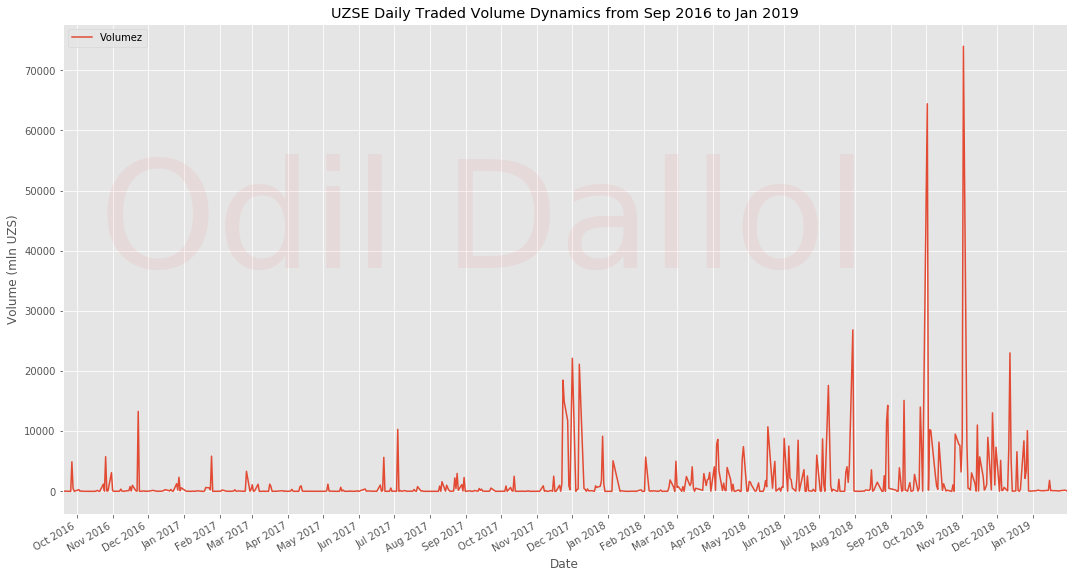

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

#plot data
fig, ax = plt.subplots(figsize = (18, 10))
totalHist.plot(ax = ax)

#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.legend(loc = 'upper left')

ax.set_title('UZSE Daily Traded Volume Dynamics from Sep 2016 to Jan 2019')
ax.set_ylabel('Volume (mln UZS)')
ax.set_xlabel('Date')

# position bottom right
fig.text(0.45, 0.7, 'Odil Dallol',
         fontsize = 150, color ='red',
         ha='center', va='top', alpha = 0.05)

In [26]:
excl = totalHist.copy()
excl.shape

(580, 1)

In [27]:
excl = excl.drop(excl[excl.Volumez > 50000].index)
excl.shape

(578, 1)

Text(0.45,0.7,'Odil Dallol')

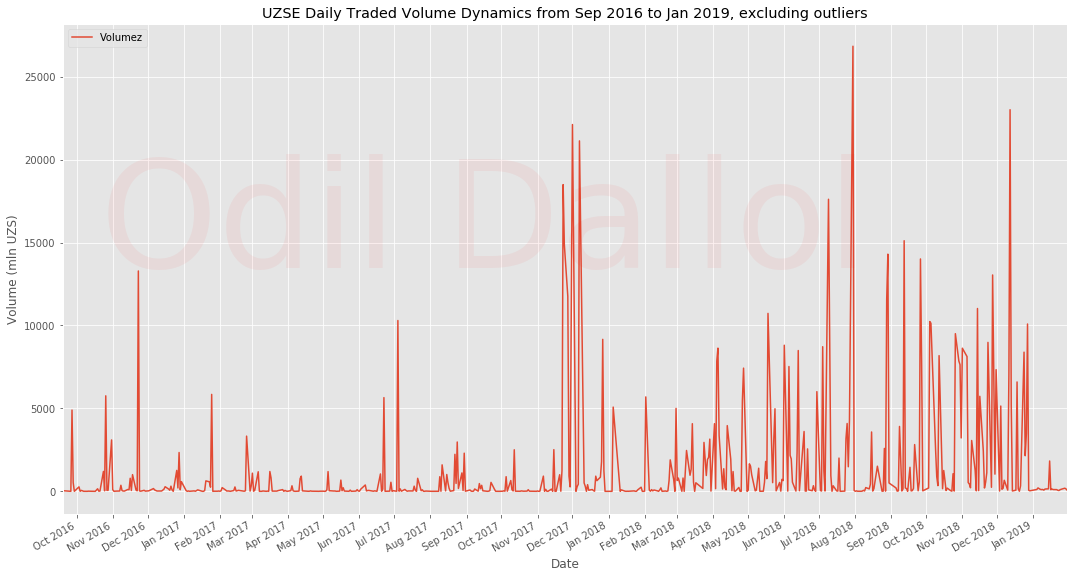

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

#plot data
fig, ax = plt.subplots(figsize = (18, 10))
excl.plot(ax = ax)

#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.legend(loc = 'upper left')

ax.set_title('UZSE Daily Traded Volume Dynamics from Sep 2016 to Jan 2019, excluding outliers')
ax.set_ylabel('Volume (mln UZS)')
ax.set_xlabel('Date')

# position bottom right
fig.text(0.45, 0.7, 'Odil Dallol',
         fontsize = 150, color ='red',
         ha='center', va='top', alpha = 0.05)